In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:

df = pd.read_excel("/content/datatab (1).xlsx")
df.columns = df.columns.str.strip()


In [32]:

df = pd.get_dummies(df, columns=["Gender"], drop_first=True)
df["Purchasing behaviour"] = df["Purchasing behaviour"].map({
    "Buy now": 1,
    "Don't buy anything": 0
})

df = df.dropna(subset=["Purchasing behaviour"])


In [26]:

X = df.drop(columns=["Purchasing behaviour"])
y = df["Purchasing behaviour"]


In [27]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [28]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



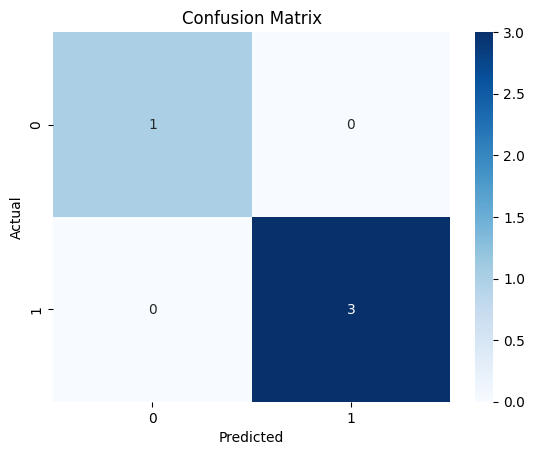

In [29]:

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
